In [34]:
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split

train_data = pd.read_csv("../data/train.csv", index_col='Id')
test_data= pd.read_csv("../data/test.csv", index_col='Id')

In [35]:
train_data.dropna(axis=0, subset=['SalePrice'], inplace=True) # droping the NaN values form SalePrice
y=train_data.SalePrice # selecting the target
train_data.drop(['SalePrice'], axis=1, inplace=True)

X_train_full, X_valid_full, y_train, y_valid = train_test_split(train_data,y, train_size=0.8, test_size=0.2, random_state=0)

num_cols = [cols for cols in X_train_full.columns if X_train_full[cols].dtype in ['int64','float64']]
X_train = X_train_full[num_cols].copy()
X_valid = X_valid_full[num_cols].copy()
X_test = test_data[num_cols].copy()

In [36]:
my_pipeline = Pipeline(steps=[    # Created a pipeline that deals with the NaN in numbers
    ('imputer', SimpleImputer()),
    ('model', RandomForestRegressor(n_estimators=200, random_state=0))
])
score = -1 * cross_val_score(my_pipeline, X_train, y_train, cv=5, scoring='neg_mean_absolute_error')
print(score.mean())  

17958.47836956947


# Finetuning n_estimators

In [37]:
def get_score(n_estimators):
    my_pipeline = Pipeline(steps=[    
    ('imputer', SimpleImputer()),
    ('model', RandomForestRegressor(n_estimators, random_state=0))
])
    score = -1 * cross_val_score(my_pipeline,X_train,y_train,cv=5,scoring='neg_mean_absolute_error')
    return score.mean()

In [38]:
result = {}
for i in range(1,9):
    result[50*i] = get_score(50*i)

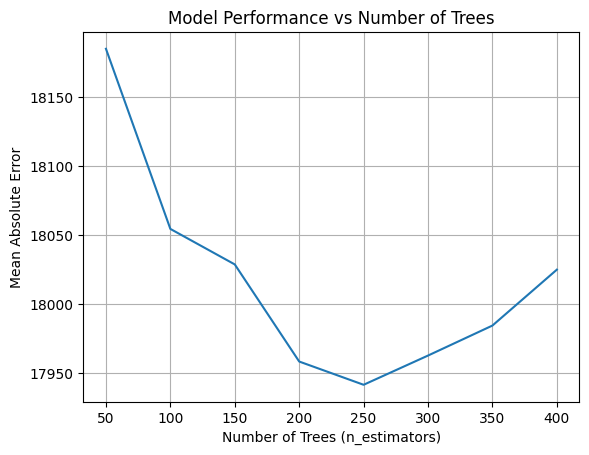

Best n_estimators : 250


In [39]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.plot(list(result.keys()), list(result.values()))
plt.title("Model Performance vs Number of Trees")
plt.xlabel("Number of Trees (n_estimators)")
plt.ylabel("Mean Absolute Error")
plt.grid(True)
plt.show()
best_n = min(result, key=result.get)
print(f"Best n_estimators : {best_n}")

In [48]:
my_pipeline = Pipeline(steps=[
    ('imputer', SimpleImputer()),
    ('model', RandomForestRegressor(n_estimators=best_n, random_state=0))
])
score = -1 * cross_val_score(my_pipeline, X_train, y_train, cv=5, scoring='neg_mean_absolute_error')
print(f"Cross validatoin score : {score.mean()}")
my_pipeline.fit(X_train,y_train)
predictions = my_pipeline.predict(X_valid)


Cross validatoin score : 17941.61395098737


In [49]:
model = RandomForestRegressor(n_estimators=best_n, random_state=0)
model.fit(X_train, y_train)
pred = model.predict(X_valid)
mae = mean_absolute_error(y_valid, pred)
print(f"Mean absolute error : {mae}")


Mean absolute error : 17758.2509086758


In [ ]:
'''
# storing the output in a csv file
output = pd.DataFrame({'Id': test_data.index, 'SalePrice': predictions})
#output['SalePrice'] = output['SalePrice'].map(lambda x: f"{x:.2f}")
output.to_csv('submission.csv', index=False)'''


'\n# storing the output in a csv file\noutput = pd.DataFrame({\'Id\': test_data.index, \'SalePrice\': predictions})\n#output[\'SalePrice\'] = output[\'SalePrice\'].map(lambda x: f"{x:.2f}")\noutput.to_csv(\'submission.csv\', index=False)'